In [1]:
import pandas as pd
import urllib
import IPython
import collections

# Extract genes from Koliaraki et al., 2019

https://www.sciencedirect.com/science/article/pii/S2211124718320175

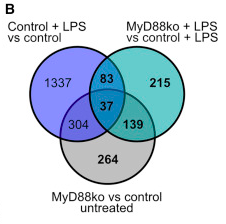

In [15]:
IPython.display.Image("Koliaraki-et-al_2019_Figure_4B.png")

In [16]:
venn_ko_vs_control = 264 + 139 + 304 + 37
print(f"Total MyD88ko vs control DEGs: {venn_ko_vs_control}")
venn_ctrl_lps_vs_control = 1337 + 83 + 37 + 304
print(f"Total Control+LPS vs control DEGs: {venn_ctrl_lps_vs_control}")
venn_ko_lps_vs_control_lps = 215 + 83 + 37 + 139
print(f"Total MyD88ko+LPS vs control+LPS DEGs: {venn_ko_lps_vs_control_lps}")

Total MyD88ko vs control DEGs: 744
Total Control+LPS vs control DEGs: 1761
Total MyD88ko+LPS vs control+LPS DEGs: 474


In figure 4B (above) the authors plot a venn diagram of differentially-expressed genes from 3 comparisons. Let's try to get those genes from their data.

In the text they reference figure S4 for individual comparisons for this venn diagram. Let's look at it:

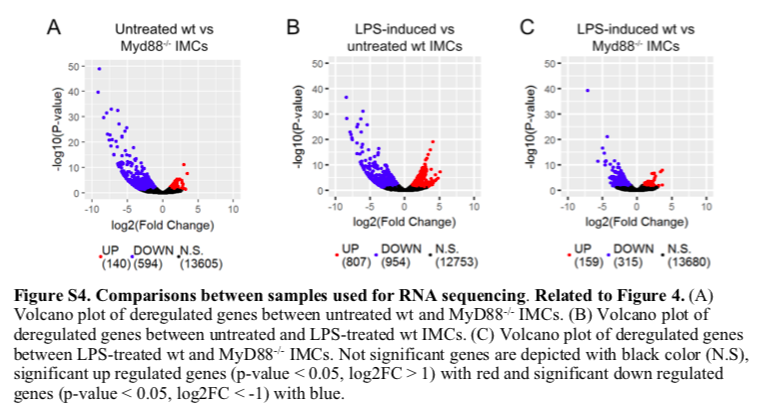

In [14]:
IPython.display.Image("Koliaraki-et-al_2019_Figure_S4.png")

In [17]:
volc_ko_vs_control = 140 + 594
print(f"Total MyD88ko vs control DEGs: {volc_ko_vs_control}")
volc_ctrl_lps_vs_control = 807 + 954
print(f"Total Control+LPS vs control DEGs: {volc_ctrl_lps_vs_control}")
volc_ko_lps_vs_control_lps = 159 + 315
print(f"Total MyD88ko+LPS vs control+LPS DEGs: {volc_ko_lps_vs_control_lps}")

Total MyD88ko vs control DEGs: 734
Total Control+LPS vs control DEGs: 1761
Total MyD88ko+LPS vs control+LPS DEGs: 474


**NB**: Total number of DEGs for MyD88KO vs Control comparison does not add up between Volcano plot (Figure S4A) and the venn diagram (Figure 4B). The other 2 comparisons add up. I suspect a typo in Figure 4B: should be 254 instead of 264 in the bottom circle.

## Download the data

For the 3 comparisons I found the links on GEO: [GSE119341](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE119341)

In [3]:
urls = {
    "ko_vs_ctrl": "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE119341&format=file&file=GSE119341_metaseqr_all_out_CU_vs_MU%2Etxt%2Egz",
    "ctrl_lps_vs_ctrl": "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE119341&format=file&file=GSE119341_metaseqr_all_out_CU_vs_CL%2Etxt%2Egz",
    "ko_lps_vs_ctrl_lps": "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE119341&format=file&file=GSE119341_metaseqr_all_out_CL_vs_ML%2Etxt%2Egz",
}

In [4]:
deg_tables = {}
for comp, url in urls.items():
    fname = f"{comp}.txt.gz"
    urllib.request.urlretrieve(url, fname)
    deg_tables[comp] = pd.read_table(fname)

### 1. Check MyD88KO vs Control comparison

In [54]:
degs = deg_tables["ko_vs_ctrl"]

In [55]:
idx = (degs["p.value_deseq"] < 0.05) & (degs["log2_normalized_fold_change_CU_vs_MU"].abs() > 1)

In [56]:
idx.sum()

735

We had 734 DEGs in Figure S4A

In [57]:
degs.gene_name[idx].nunique()

734

Ok, 734 genes with unique names. This is what we're looking for!

In [58]:
deg_lists = {}
deg_lists["ko_vs_ctrl"] = degs.gene_name[idx].unique()

In [59]:
export = degs.loc[:, ["gene_id", "gene_name", "p.value_deseq", "FDR_deseq", 
                      "log2_normalized_fold_change_CU_vs_MU", "log2_normalized_mean_counts_CU",
                      "log2_normalized_mean_counts_MU"]]

In [60]:
export.insert(4, "status", "No change")

In [61]:
export.loc[(export["p.value_deseq"] < 0.05) 
                 & (export["log2_normalized_fold_change_CU_vs_MU"] > 1), "status"] = "Upregulated"

In [62]:
export.loc[(export["p.value_deseq"] < 0.05) 
                 & (export["log2_normalized_fold_change_CU_vs_MU"] < -1), "status"] = "Downregulated"

In [63]:
export.sort_values("log2_normalized_fold_change_CU_vs_MU").to_csv("ko_vs_ctrl-degs.csv")

### 2. Check Control+LPS vs Control comparison

In [64]:
degs = deg_tables["ctrl_lps_vs_ctrl"]

In [65]:
idx = (degs["p.value_deseq"] < 0.05) & (degs["log2_normalized_fold_change_CU_vs_CL"].abs() > 1)

In [66]:
idx.sum()

1761

In [67]:
degs.gene_name[idx].nunique()

1759

2 less genes than we have on the Volcano plot (Figure S4B). What can I do?

In [68]:
deg_lists["ctrl_lps_vs_ctrl"] = degs.gene_name[idx].unique()

In [69]:
export = degs.loc[:, ["gene_id", "gene_name", "p.value_deseq", "FDR_deseq", 
                      "log2_normalized_fold_change_CU_vs_CL", "log2_normalized_mean_counts_CU",
                      "log2_normalized_mean_counts_CL"]]

In [70]:
export.insert(4, "status", "No change")

In [71]:
export.loc[(export["p.value_deseq"] < 0.05) 
                 & (export["log2_normalized_fold_change_CU_vs_CL"] > 1), "status"] = "Upregulated"

In [72]:
export.loc[(export["p.value_deseq"] < 0.05) 
                 & (export["log2_normalized_fold_change_CU_vs_CL"] < -1), "status"] = "Downregulated"

In [73]:
export.sort_values("log2_normalized_fold_change_CU_vs_CL").to_csv("ctrl_lps_vs_ctrl-degs.csv")

### 3. Check MyD88KO+LPS vs Control+LPS comparison

In [42]:
degs = deg_tables["ko_lps_vs_ctrl_lps"]

In [43]:
idx = (degs["p.value_deseq"] < 0.05) & (degs["log2_normalized_fold_change_CL_vs_ML"].abs() > 1)

In [44]:
idx.sum()

474

In [45]:
degs.gene_name[idx].nunique()

474

Finally, the number of DEGs corresponds to the Volcano plot (Figure S4C).

In [46]:
deg_lists["ko_lps_vs_ctrl_lps"] = degs.gene_name[idx].unique()

In [48]:
export = degs.loc[:, ["gene_id", "gene_name", "p.value_deseq", "FDR_deseq", 
                      "log2_normalized_fold_change_CL_vs_ML", "log2_normalized_mean_counts_CL",
                      "log2_normalized_mean_counts_ML"]]

In [49]:
export.insert(4, "status", "No change")

In [50]:
export.loc[(export["p.value_deseq"] < 0.05) 
                 & (export["log2_normalized_fold_change_CL_vs_ML"] > 1), "status"] = "Upregulated"

In [51]:
export.loc[(export["p.value_deseq"] < 0.05) 
                 & (export["log2_normalized_fold_change_CL_vs_ML"] < -1), "status"] = "Downregulated"

In [53]:
export.sort_values("log2_normalized_fold_change_CL_vs_ML").to_csv("ko_lps_vs_ctrl_lps-degs.csv")

### 4. Split DEG lists into Venn diagram groups

In [59]:
sorted(deg_lists.keys())

['ctrl_lps_vs_ctrl', 'ko_lps_vs_ctrl_lps', 'ko_vs_ctrl']

In [60]:
groups = {
    "ctrl_lps_vs_ctrl": 1,
    "ko_lps_vs_ctrl_lps": 2,
    "ko_vs_ctrl": 3,
    "ctrl_lps_vs_ctrl,ko_lps_vs_ctrl_lps": 4,
    "ctrl_lps_vs_ctrl,ko_vs_ctrl": 5,
    "ko_lps_vs_ctrl_lps,ko_vs_ctrl": 6,
    "ctrl_lps_vs_ctrl,ko_lps_vs_ctrl_lps,ko_vs_ctrl": 7
}

In [62]:
gene_to_comparison = collections.defaultdict(list)

In [64]:
for comp, degs in deg_lists.items():
    for gene in degs:
        gene_to_comparison[gene].append(comp)

In [66]:
genes = []
gene_comps = []
for gene, comps in gene_to_comparison.items():
    genes.append(gene)
    gene_comps.append(",".join(sorted(comps)))

In [71]:
result = pd.DataFrame({"Gene": genes, "Group": gene_comps})

In [73]:
result.Group = result.Group.map(groups)

In [79]:
result = result.sort_values(["Group", "Gene"])

In [80]:
result.to_csv("figure_4b_degs.csv")

In [81]:
result.Group.value_counts().sort_index()

1    1345
2     215
3     264
4      83
5     294
6     139
7      37
Name: Group, dtype: int64

Some minor differences from Figure 4B:

Group 1 has 1337 in the figure  
Group 2 is OK  
Group 3 is OK  
Group 4 is OK  
Group 5 has 304 in the figure  
Group 6 is OK  
Group 7 is OK

In [82]:
result.loc[result.Group == 7]

,Gene,Group
470,Bcl3,7
332,Ccl2,7
331,Ccl7,7
435,Cd24a,7
370,Cdh6,7
535,Cebpd,7
241,Cxcl1,7
240,Cxcl5,7
90,Dram1,7
506,Fabp4,7


In [83]:
result.loc[result.Gene == "Myd88"]

,Gene,Group
300,Myd88,6
